# Download the Dataset
 Download the Dataset from the following link: https://www.kaggle.com/mirichoi0218/insurance/download

# Read the Dataset
Read the dataset into a Pandas Dataframe.

Does the dataset include any missing values? If so, drop them.

Hint: Pandas can do that with one line of code!

In [15]:
import pandas as pd

df = pd.read_csv('insurance.csv')

print("Shape before any drops:",df.shape)
df.dropna()
print("Shape after any drops:",df.shape)

df.head()

Shape before any drops: (1338, 7)
Shape after any drops: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Perform Preprocessing
Perform any needed preprocessing on the chosen features including:
- Scaling.
- Encoding.
- Dealing with Nan values.
- Normalization.

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["sex"] = encoder.fit_transform(df["sex"])
df["smoker"] = encoder.fit_transform(df["smoker"])
df["region"] = encoder.fit_transform(df["region"])

y = df.iloc[:,-1]
X = df.iloc[:,0:-1]

X.head()


,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,-0.908614,1,3
1,-1.509965,1,0.509621,-0.078767,0,2
2,-0.797954,1,0.383307,1.580926,0,2
3,-0.441948,1,-1.305531,-0.908614,0,1
4,-0.513149,1,-0.292556,-0.908614,0,1


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(X)

scaled_features = pd.DataFrame(scaled_features, columns=X.columns)

scaled_features.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915


# Prepare Visualization

You are required to deliver a number of visualization for your dataset, including:
- Pair Plots for the features.
- Correlation Matrix heat map.
- Box plots for the features.

Hint: Feel free to add any other visualizations you would like!

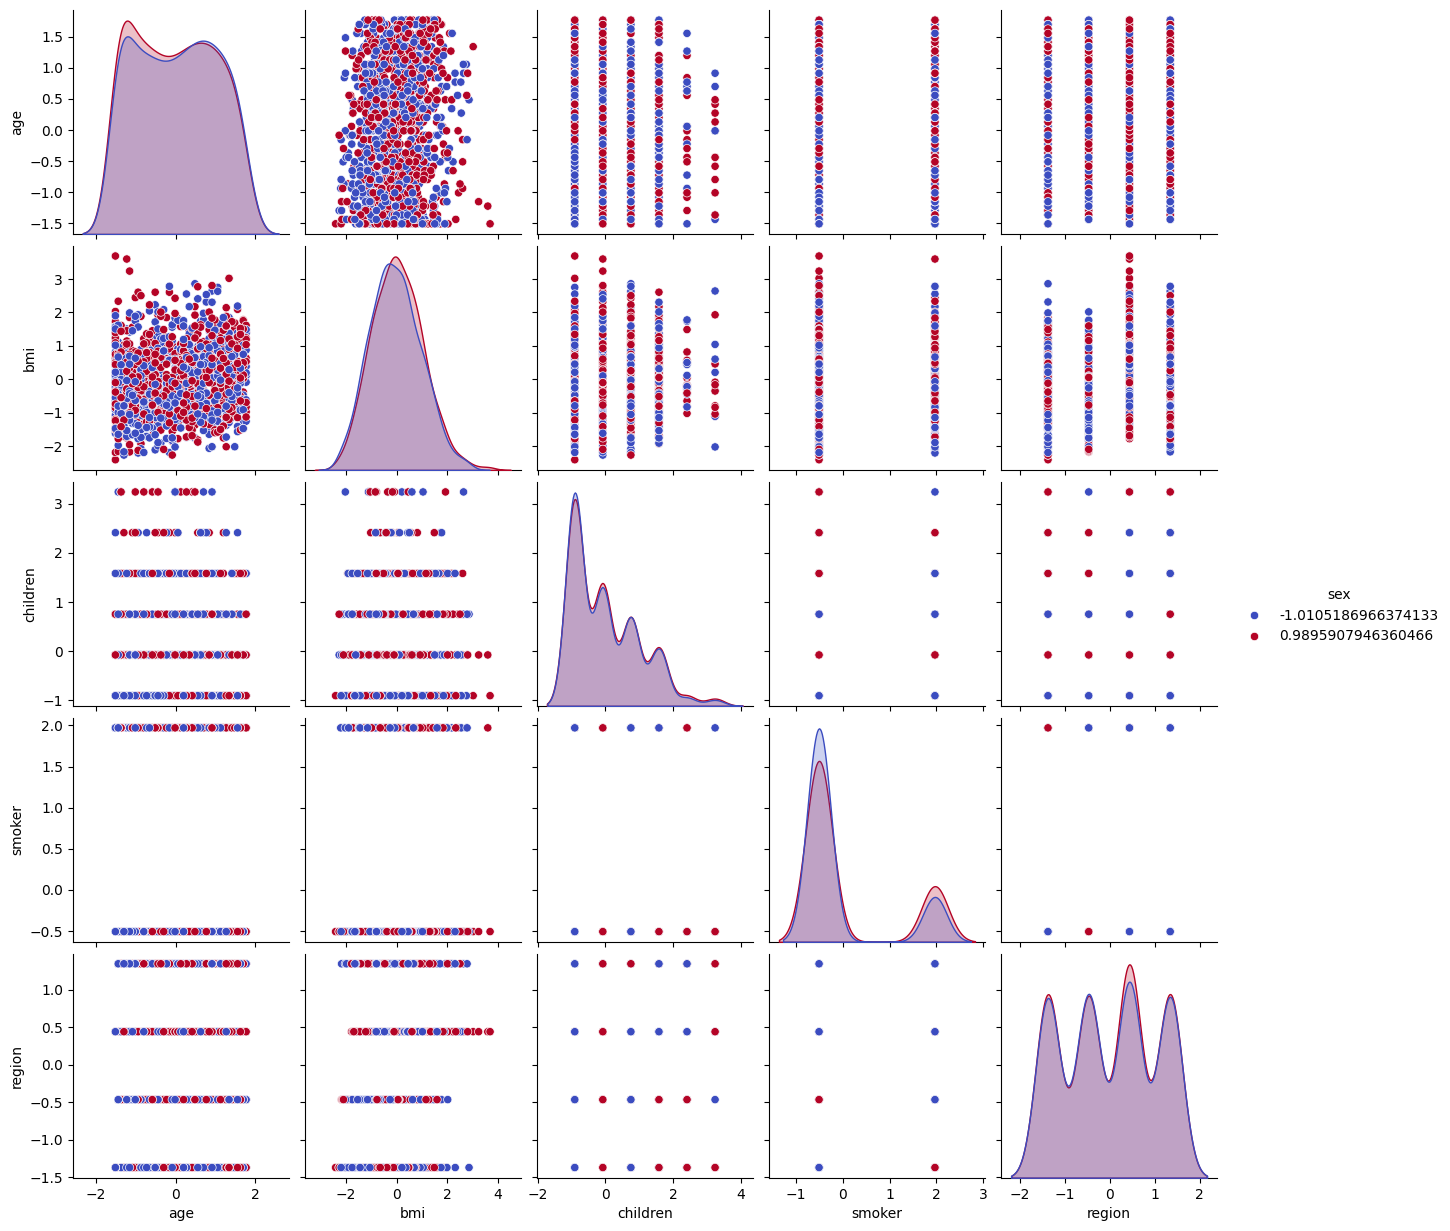

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(scaled_features, hue='sex', palette='coolwarm')

<Axes: >

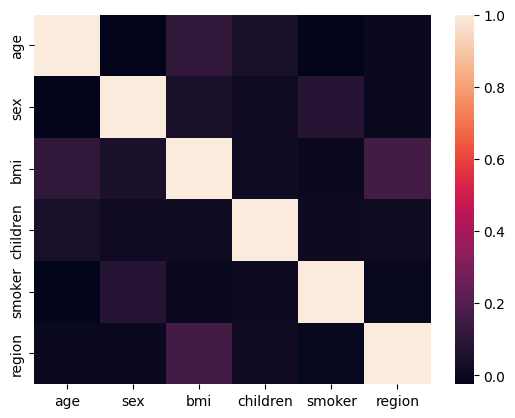

In [50]:
sns.heatmap(scaled_features.corr())

<Axes: >

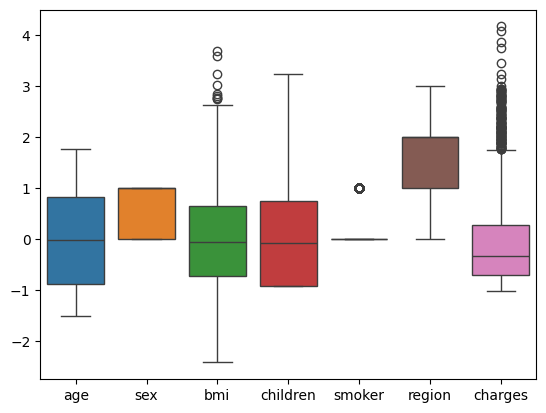

In [51]:
sns.boxplot(df)

# Split the Data

Split your data as follows:
- 80% training set
- 10% validation set
- 10% test set

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=0)
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(len(X_validate))
print(len(y_validate))

1070
1070
134
134
134
134


# Train Regressor

Use decision trees, random forests and support vector regressions (SVRs) to fit your data.

Get r2 scores, mean square error (MSE) scores and mean absolute error (MAE) scores. You need a minimum r2 score of 82%

Compare the results of different models.

Hint: You need to choose the optimal value for the criteria for both decision trees and random forests using cross-validation.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTmodel = DecisionTreeRegressor(random_state=0, criterion='friedman_mse')
DTmodel.fit(X_train, y_train)
DTscore = DTmodel.score(X_test, y_test)
print('DTScore:', DTscore)

from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor(random_state=0, n_estimators=5, criterion='friedman_mse')
RFmodel.fit(X_train, y_train)
RFscore = RFmodel.score(X_test, y_test)
print('RFScore:', RFscore)

from sklearn.svm import SVR
SVmodel = SVR(C=1.0, kernel="rbf", gamma="auto")
SVmodel.fit(X_train, y_train)
SVscore = SVmodel.score(X_test, y_test)
SVscoreValidate = SVmodel.score(X_validate, y_validate)
print('SVScore:', SVscore)
print('SVscoreValidate:', SVscoreValidate) # Interestingly it dropped by over 10% here on the validation data

# Best score (94.8%) was SVR with rbf kernal


DTScore: 0.6910540593035968
RFScore: 0.9177882148577499
SVScore: 0.9481552078619992
SVscoreValidate: 0.8303475742024156
